# Problem statement

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cost_df = pd.read_csv('EconomiesOfScale.csv')

In [5]:
cost_df.head(100)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
...,...,...
95,2.761981,48.258282
96,2.762052,50.216171
97,2.763321,63.478275
98,2.766303,58.190435


In [6]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [7]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


# visualize dataset

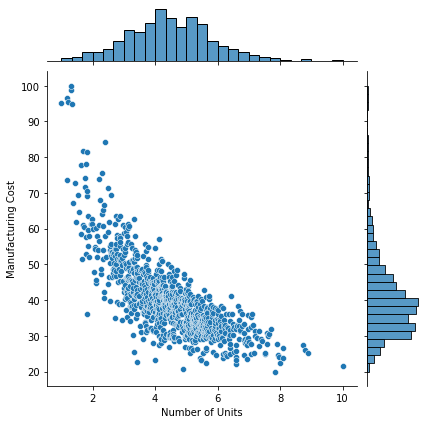

In [9]:
sns.jointplot(x = 'Number of Units', y = 'Manufacturing Cost', data = cost_df)

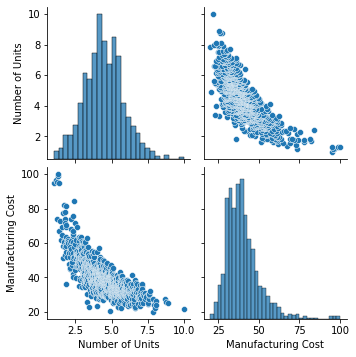

In [12]:
sns.pairplot(cost_df)

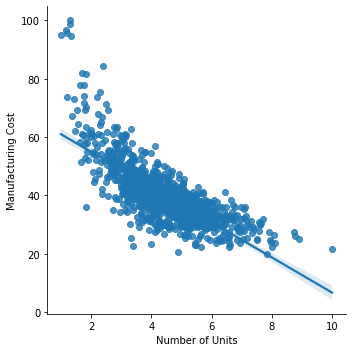

In [13]:
sns.lmplot(x = 'Number of Units', y = 'Manufacturing Cost', data = cost_df)

# Create training data set 

In [14]:
X = cost_df[['Number of Units']]

In [15]:
y = cost_df[['Manufacturing Cost']]

In [16]:
X_train = X
y_train = y

# Model training 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression(fit_intercept = True)

In [19]:
regressor.fit(X_train,y_train)

LinearRegression()

In [20]:
print('Model Coeff(m)',regressor.coef_)
print('Model Coeff(b)',regressor.intercept_)

Model Coeff(m) [[-6.0333683]]
Model Coeff(b) [67.03904193]


# Visualize the Result

Text(0.5, 1.0, 'Unit cost vs. Number of units [Linear]')

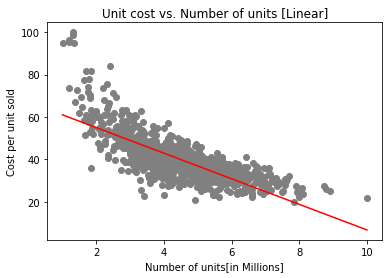

In [26]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Number of units[in Millions]')
plt.ylabel('Cost per unit sold')
plt.title('Unit cost vs. Number of units [Linear]')

# Model Training (Polynomial)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly_regressor = PolynomialFeatures(degree = 5)

In [71]:
X_column = poly_regressor.fit_transform(X_train)

In [72]:
X_column

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.18599365e+00, 1.40658094e+00, 1.66819606e+00,
        1.97846993e+00, 2.34645277e+00],
       [1.00000000e+00, 1.19149864e+00, 1.41966901e+00, 1.69153369e+00,
        2.01546010e+00, 2.40141796e+00],
       ...,
       [1.00000000e+00, 8.78088812e+00, 7.71039962e+01, 6.77041565e+02,
        5.94502623e+03, 5.22026103e+04],
       [1.00000000e+00, 8.89769971e+00, 7.91690601e+01, 7.04422522e+02,
        6.26774007e+03, 5.57684690e+04],
       [1.00000000e+00, 1.00000000e+01, 1.00000000e+02, 1.00000000e+03,
        1.00000000e+04, 1.00000000e+05]])

In [73]:
regressor = LinearRegression()
regressor.fit(X_column,y_train)

LinearRegression()

In [74]:
print('model coef', regressor.coef_)

model coef [[ 0.00000000e+00 -9.24985286e+01  3.06811266e+01 -5.35771972e+00
   4.64221376e-01 -1.56845726e-02]]


In [75]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'Unit cost vs. Number of units [Poly Order = 4]')

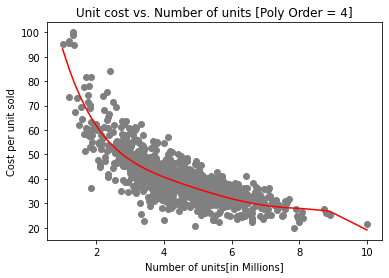

In [76]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, y_predict, color = 'red')
plt.xlabel('Number of units[in Millions]')
plt.ylabel('Cost per unit sold')
plt.title('Unit cost vs. Number of units [Poly Order = 4]')